## Authors
## ----------------------------------------

### Kiara Gabriel             -    2161334

### Phola Bavuma          -    1848739

### Shravan Singh         -    2173638

### Arneev Singh          -    2180393

## ----------------------------------------

# Questions

Answering the questions from the PDF.

## Question 1

We are using a **phishing** dataset.
Basically, it has a list of features of the website and the URL of the wesbite, and it will predict whether or not the website is a phishing(dangerous) website or not.

We chose this important and interesting dataset because an algorithm to determine if a website is phishing or legitimate is particularly helpful for anyone using the internet (most people). There are many cases where people have given personal and confidential information to websites, thinking that they are legitimate. This will help people predict whether or not a website is phishing or not and will save them their information, time and possibly money.

We found it on **kaggle**, here is the link: https://www.kaggle.com/manishkc06/web-page-phishing-detection

The target of this dataset is contained in the `status` column which tells us whether or not the website is `Phishing (represented as 1)` or `Legitimate (represented as 0)`

We have **11481 records** (data points) with **89 columns** HOWEVER, we deleted a few columns and we currently have **57 features** (excluding the URL string - not a feature but some of the features are based off the URL).  (*Explained in Question 2*)

Please see below covariance vector (All the features with their covariance relative to the `status`.


In [19]:
covVec.head(100)

,status
length_url,0.122758
length_hostname,0.124186
ip,0.159140
nb_dots,0.100476
nb_hyphens,-0.048708
nb_qm,0.146679
nb_and,0.086875
nb_eq,0.117088
nb_underscore,0.020014
nb_slash,0.119932


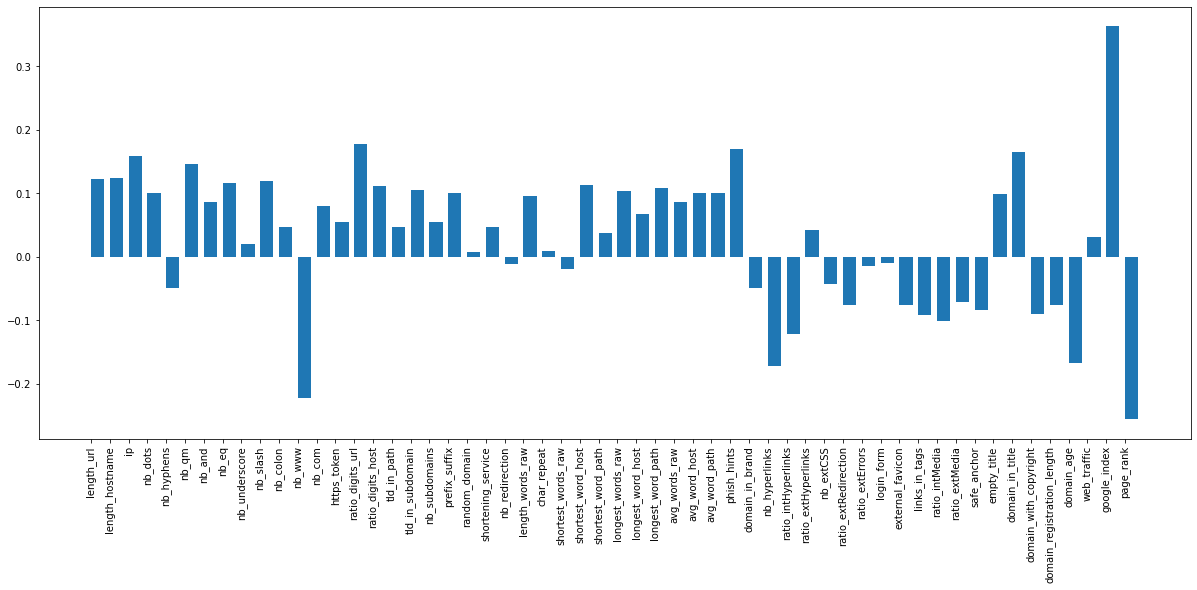

In [20]:
printCovPlot()

As we can see, there are a decent amount of covariance difference between the features. Some matter more than others.

The classes are not balanced as expected, there are going to be more 'weighted' indicators to tell whether a website is phishing or not, such as whether it shows up in the first few sites to click on, on google (google_index) compared to how many characters repeat in the URL (char_repeat).

Website phishing detection is important as in this day and age, where we so technologically reliant on the web, we need to know whether the sites we use are harmful or not. This is why it is important to distinguish between safe and dangerous websites.

There are 89 features that needs explaining, please refer to the PDF document (Features.pdf)

## Question 2

We loaded the CSV data into a `pandas.DataFrame`.

All of our features were supposed to be numerical (excluding `URL` and `status`)

Some of them however had 'zero' and 'one' representing 0 and 1 respectively. So we looped through each row and changed those to their numerical form and then we changed the data type of the column to either `int64` or `float64`.

We stored the `URL` and the `status` column in their own variables and then deleted them from the `pandas.DataFrame`, this is so why we have all our features containing numerical values.

We now normalized the data for each taking each point, subtracting the mean for the feature and dividing that by the standard deviation for that 

`x = Data Point`   
`mean = Mean of Feature`    
`std = Standard Deviation of Feature`

`FORMULA: normalizedValue = (x - mean)/(std)`

We did not have any missing data values **fortunately :)** 

With regards to deleting columns,

We started off with **89 features** but ended with **57 features** after the cleaning process.

We only manually deleted one feature and the rest were deleted. 
We deleted the `whois_registered_domain`, as we do not know what it represents AND that the correlation between it and the `status` is low.

If there were only 2 unique values for the feature, if either one of the unique values occurances were below the threshold (`500`), it would get deleted.

We would test out multiple threshold values HOWEVER, most of our algorithms take a long time to run so we left it out.

Each of us split the data differently, 

### Decision Trees

We split the data using `numpy` and `pandas`. 

It got split into **70% for training** and **30% for testing**

### Linear Regression

We split the data using the `sklearn.model_selection.train_test_split` function from the `sklearn` package. 

It got split into **60% for training**, **20% for validation** and **20% for testing**

### Logistic Regression

We split the data using the `sklearn.model_selection.train_test_split` function from the `sklearn` package. 

It got split into **60% for training**, **20% for validation** and **20% for testing**

### K-Nearest Neighbour

We split the data using `numpy` and `pandas`. 

It got split into **60% for training**, **20% for validation** and **20% for testing**

## Question 3 & 4

We broke this question down into 4 sections, each section for each algorithm.

`  
(1) Decision Trees
(2) Linear Regression
(3) Logisitic Regression
(4) K-Nearest Neighbour
`

### Decision Trees

We have decided to choose Decision Trees as a model to predict our outputs because it will continuously split our data into the most probable classification. Decision trees also *reveal the most influential features* in our database by measuring the information gain from each feature and selecting the most optimal split for the next branch of the tree.

**Explanation of Algorithm**

The algorithm takes in a training set with $X$ and $Y$ values and begins to find the best spit point to branch out the data. The two stopping criteria’s used for this model is the min number of datapoints, which dictates the minimum number of datapoints that the model must use before a split, and the max depth of the tree, which stipulates the maximum depth of the tree (to prevent overfitting).

Looping through each possible value for a feature to find the optimal threshold for the split would be too expensive and time consuming as we would have to run through each float between the $Min$ and the $Max$ of the values in the column. 

So to find the thresholds to split each feature we decided to find all the unique values in each feature and compare the information gained from each to find the most optimal split. Once the best flit threshold has been computed the dataset is split into two nodes which represent the data that satisfies the threshold and the data that doesn’t satisfy the threshold. 

This procedure is continuously repeated until the Stopping criteria’s have been met or until there are no more remaining data points to separate.

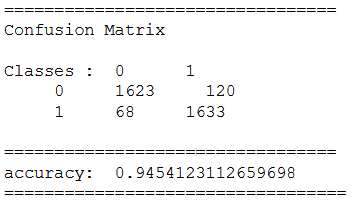

In [22]:
# Refer to DecisionTrees.ipynb for model
showImage("DT.png")

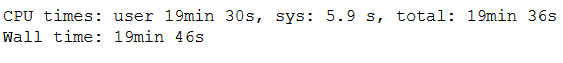

In [23]:
showImage("DT_Time.png")

Phishing website URL identities have improved the ability to mask as a legitimate URL immensely to the point that using the human eye it would be near impossible to predict if the URL is legitimate or not.

For example: The two URLs  https://www.hornguys.com/ and http://betasus7.blogspot.com/ have similar structures but one is a phishing site and the other is a legitimate site. Guessing the difference between the two would be as probable as guessing heads or tails for a coin flip. But using a decision tree the model is able to make a 94.5 % accuracy guess on the problem.

### Linear Regression

We chose Linear Regression as one of our Machine Learning Models because it is a simple and commonly used algorithm used for prediction analysis. Our dataset is to predict if a URL given leads to a phishing website or not, so we are using the algorithm to predict the status of the website. Due to the fact that We have multiple features, this model is accually called *Multivariate Linear Regression.*

**Explanation of Algorithm**

This algorithm has two solutions (we implemented both) - the *closed-form solution* and *gradient descent.*                  

`Closed-Form Solution:` this solution allows us to calculate the most optimal values for theta using the formula: 

theta = $((X)^{Y}$$X)$$^{-1}$$(X^{T}$$y)$

We can calculate these theta values using the training dataset and then use the values calculated as the thetas in the validation and testing datasets. This solution is very accurate and does not have a long compute time due to our dataset not being overly huge.

`Gradient Decsent:` this algorithm finds the best-fit line for the cost function of the data by taking tiny iterative steps (to best represent the cost function). It iteratively finds new theta values using the previous theta values calculated in the previous iteration. The new theta values are calculated using the formula:

$newTheta = oldTheta - a(predictedY - trueY)x$

Based off the confusion matrices we calculated from both of these solutions, the gradient descent usually does 2x worse than the closed-form solution. After multiple runs, the closed-form solution gets around a 92% accuracy and the gradient descent gets around 45%

**Hyperparameters**

`Closed-Form Solution:` the hyperparameter used in this solution was lambda which is used for regularisation. For the training data we chose `lambda = 0.1`. The lambda is not very small because the compute time takes longer for a very very mininimal increase in the accuracy (~ 0.0005%). 


`Gradient Decsent:` we used two hyperparameters: alpha and the stopping value. Alpha is used to calculate the new theta values (small iterative steps to get closer to the cost function) and the stopping value is used as a stopping criteria for the algoritm - the smaller the hyperparameters, the more accurate. For testing we used `alpha = 0.00001` and `stoppingVal = 0.001`. 

**Regularisation**

As mentioned above, regularisation was used in the `closed-Form solution` but the affect was extremely small so we decided that the extra compute time was not beneficial to add it the `gradient decsent`.

**Basis Function**

y = $theta$$_{0}$ $+$ $theta$$_{1}$$*$$x_{1}$ $+$ $theta$$_{2}$$*$$x_{2}$ $+$ $...$ $+$ $theta$$_{n}$$*$$x_{n}$
where $n$ = the number of features `(57)`

**Validation Data**

For the validation data, we used multiple different values for the hyperparameters to find the highest accuracy.

`Closed-Form Solution:` lamda = [0.001, 0.05, 0.1, 2, 5]

`Gradient Decsent:` alpha = [0.00001, 0.01, 1, 5] ; stopping values = [0.0001, 0.1, 1, 5]

**Testing Data**

`Closed-Form Solution:` lamda = 0.001

`Gradient Decsent:` alpha = 0.00001 ; stopping values = 0.0001

Closed Form Solution



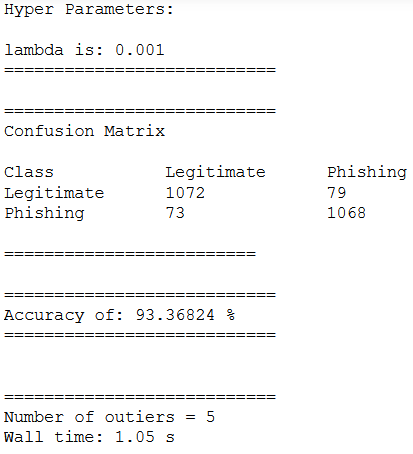

In [13]:
# Refer to Linear_Regression.ipynb for model
print("=====================")
print("Closed Form Solution")
print("=====================\n")
showImage("Linear_R_CFS.png")

In [22]:
print("===========================================================================")
print("This time is for how long it took to train the data,\nthe time above is for how long it took to classify the test data")
print("===========================================================================\n")

showImage("Linear_R_CFS_Time.png")

This time is for how long it took to train the data,
the time above is for how long it took to classify the test data



Gradient Descent



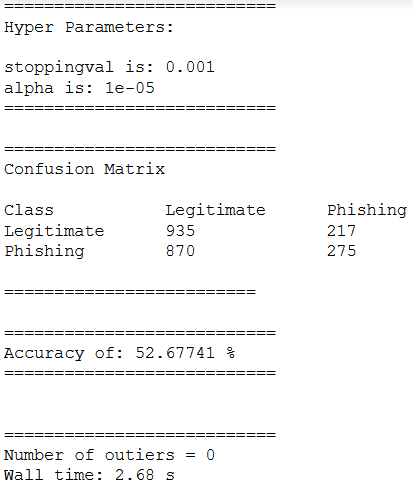

In [15]:
# Refer to Linear_Regression.ipynb for model
print("=====================")
print("Gradient Descent")
print("=====================\n")

showImage("Linear_R_GD.png")

In [21]:
print("===========================================================================")
print("This time is for how long it took to train the data,\nthe time above is for how long it took to classify the test data")
print("===========================================================================\n")


showImage("Linear_R_GD_Time.png")

This time is for how long it took to train the data,
the time above is for how long it took to classify the test data



### Logistic Regression

We chose logistic regression because it is a Supervised Classification model which will be able to accurately predict binary classes based on our input. Logistic Regression also has three Hyperparameters which could make the model even more accurate by doing hyperparameter tuning using a grid search algorithm.

**Explanation of Algorithm**

Logistic regression works by using a `Sigmoidal Function` to compress an infinitely wide range of $x$ values into a range of `0` and `1`. We then simply round off the value to allocate it to class 0 or class 1. In this case, the values that it compresses are two vectors that are multiplied together using a dot product. The two vectors are the features of our input data and the values of theta.

We had a Logistic Regression function that trained the model and returned the optimal values of theta. Our function took in the following parameters:

`An initial guess for theta`                                         
`Gradient Descent value`                                             
`Strength of Regularization`                                    
`The input data`                                                
`The output data`

Using the aforementioned parameters, the model would return the optimal values of theta.

**Hyperparameters**

With Logistic Regression we have three Hyperparameters.

`A threshold for theta`                                           
`Gradient Descent value`                                      
`Strength of Regularization`

However, since our validation data was 2217 records with 56 parameters. We decided to not have a threshold for theta. Instead, we ran the algorithm 10 times as we achieved a $94.3$% accuracy. It would have been a waste of computation and time in order to implement a threshold. As well as onsidering the values of theta changed largely throughout each iteration.

For $alpha$, we had 4 values to find out which was most optimal. So we ran the algorithm on the validation data with the same initial theta but for the different values of alpha.                                            
$alpha$ = [0.1, 0.01, 0.001, 0.0001]

Doing this we then found out that the smallest alpha was the most optimal value. As for the strength of regularization we ran through 3 different values for each $alpha$.

$lambda$ = [0, 0.001, 0.002]
By doing this we found that the optimal value for $lambda$ was `0`. Implying that no regularization was needed, and the algorithm worked best without it. This was rather a surprising conclusion considering that regularization helps in improving the model’s prediction ability.

Hence in the end we trained the model with $alpha$ = 0.0001 and $lambda$ = 0

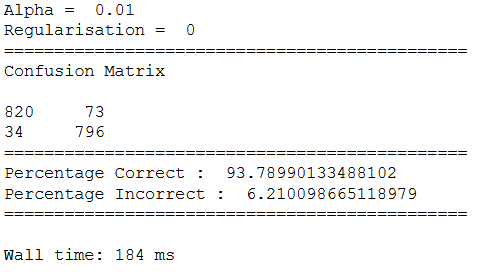

In [24]:
# Refer to Loogistic_Regression.ipynb for model
showImage("Logi_R.png")

In [26]:
print("===========================================================================")
print("This time is for how long it took to train the data,\nthe time above is for how long it took to classify the test data")
print("===========================================================================\n")


showImage("Logi_R_Time.png")

This time is for how long it took to train the data,
the time above is for how long it took to classify the test data



The problem arises when we have non linearities in the data or when features itself do not correlate linearly with the output classes. Beause of these problems the model did not predict a **few** data points correctly.

If I were to guess of which sites would be phishing or not. I would definitely guess less accurately than the machine. This is because the Linear Regression model would be able to correlate which features play an important factor in detecting phishing. With the size of the data it would be difficult for a human to remember the records as well as pick up traces in the data unlike the model which would have coefficients to know how important a feature is.

### K-Nearest Neighbour

We wanted to see how a clustering algorithm would perform on this data set. The regressions are well, regressions and Decision Trees are it's own unique algorithm.

Clustering was meant to be it's own unique algorithm (relative to the algorithm we doing) in this project. We were curious about it's results.

There is no regularisation for this algorithm.
We used all the features avaliable after cleaning.

We only had one hyperparameter which was the value for `k`.

**Explanation of Algorithm**

So basically this algorithm will have a graph of all your training data points.

And once you put in a new point to predict, it will find the closets `k` training data points. 

The training data points have the target class stored within them, so from the `k` training data points, you get their target values (`1 for phishing, 0 for legititmate`)

The one with the most occurances would be what the inputed data point will be predicted as.

**End of Explanation**

So this is what the `k` value represents in K-Nearest Neighbour.

The higher the `k` value, the more points the inputed data point will have to determine if it's a `1 (phishing)` or `0 (legititmate)`

We tested a wide range of possible k values (Also note k **should** be odd)

These are the k values we tried out [3,5,7,9,15,27,51,67,99,217,515,999]

The optimal k value we found was for when `k = 5`

`k` was picked for the model that had the highest accuracy

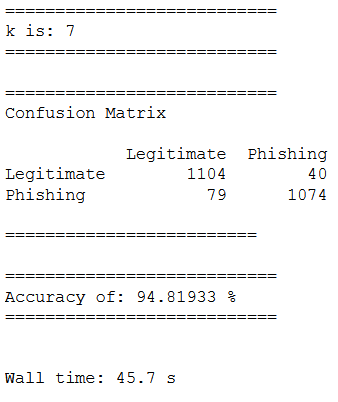

In [26]:
# Refer to KNN.ipynb for model
showImage("kNN.png")

This is quite a nice accuracy however, it can be improved. 

One reasoning for how the accuracy could imporve is that the cleaning process be more rigiorous and try to eliminate all outliers as much as possible. 

We could drop the threshold for the data set even more to generalize it but we not sure how the accruacy would be affected by it. (It is unpredictable)

For the **average** human being who wouldn't be able to tell if a URL leads to a phishing website or not, getting scammed is not easy but it is also not hard either. 

We don't know the probability of the average person falling victim to phishing websites.

Personally though, there are a few signs that tell us if a website is dodgey or not.

For example, if the protocol is using either `https` or `http`.                                 
If the URL length is too long.      
If the domain is something unfamilar (**not** `com`, `org` `co.za` .etc)   

Nevertheless, the algorithm would defiently be **way** more accurate than any of us would. As the dataset itself contains more features than I would think of for checking if the URL leads to a phishing website or not.



## Question 5

**Struggles**

`Decision Trees: ` Due to the Decision tree’s nature of continuously splitting the data into multiple branches, this can cause the Decision tree to over fit the data and output slightly skewed results for new inputs. 

To combat these problems we have included a min number of datpoints feature, which specifies the minimum number of datapoints so be split, and Maximum depth of the tree, which controls the depth of the tree to ensure the model doesn’t over fit.
    
`Linear Regression: ` This algorithm struggles with outliers. We calculated the number of outliers in our solution (where the predicted value was neither a `0` or `1`) and had that for the closed-form solution there was usually approximately `10 outliers`, and for gradient descent there was usually `0 outliers`. This is presented in the above image under *Linear Regression*.
    
`Logistic Regression: ` The Logistic Regression model struggles with nonlinearities  between the features and the classes. If there is a nonlinear correlation the model will predict inaccurately on these data points. There weren't many but there were a few. Hence the **93.79%**.
    
`K-Nearest Neighbour: ` The K-Nearest Neighbor is sensitive to irrelevant features. We could have done a more thorough cleaning of the data set to increase our accuracy.

Overall, the data was decent quality in our opinion and cleaned satisfactory, KNN did not struggle much with our data set.

**How we could have solved some issues**

Our algorithms got a decent accuracy, the few outliers in our dataset caused the accuracy to drop as our algorithms do not handle the outliers too well.

**What went well?**

`Decision Trees: ` Testing the tree was a speedy task as the model doesn't require for the whole tree to be read but only the branches that satisfy the testing datapoint
    
`Linear Regression: ` The closed form solution was easy to implement and it ran relatively fast (**93.37%**) due to numpy's matrix math operations.

`Logistic Regression: ` With the Logistic Regression model, a lot of the the features linearly correlated with the output class. That worked best since **most** of the data was linearly correlated.
    
`K-Nearest Neighbour: ` The K-Nearest Neighbor is pretty robust against noisy data. Fortuanetly, our data was not very noisy. Nevertheless, there was some noise involved and KNN dealt with that well.

The algorithm was realtively fast with the testing data run being only **$45.7$** seconds thanks to pandas dataframe math operations being so blazing fast.

**What went bad?**

`Decision Trees: ` Picking very ineffective stopping criteria's for the algorithm caused the model to overfit the dataset and provide an inflated accuracy. Also training of the tree took slightly long as the large dataset has been continuously split over a large number of features.
    
`Linear Regression: ` The Gradient descent solution performed poorly even with a low alpha value. There were rare occasions where the accuracy was above a $70$% but most times it was around $40$%. These solutions take a very long time to compute.
    
`Logistic Regression: ` The logistic regression model is more computationally expensive in comparison to linear regression hence the algorithm ran slower.
    
`K-Nearest Neighbour: ` The algorithm is slow if you use normal python functions and math operations but if you use the pandas dataframe's operations it is a lot quicker. Nothing went bad but, if we weren't using pandas, the algorithm would be a lot slower.

**What algorithm did the best**

The **K-Nearest Neighbour** algorithm did the the best with 94.82% accuracy with 45.7 seconds. 

The **Linear Regression Closed Form Solution** got an accuracy of 93.37% with 3.45 seconds.

Both of these did reasonably well, closed form linear regression was by far the fastest. KNN got the highest accuracy. 

In a real world situation, KNN would be considered the best algorithm, but if you were going soley based off the highest accuracy to time ratio, then Linear Regression Closed Form Solution would be better.


**What we would recommend**

If you want the most accuracy, then you should choose the **K-Nearest Neighbour** model, the differences between accuracies among our algorithms are not much. So not much difference.

If you want to see how different types of algorithms would work, such as clustering, decision tree classification or regression, we would recommend you try all 4 of the algorithms out.


**Time of each algorithm discussion**

`Decision Trees: ` This took 19 mins and 46 seconds to run, it was reasonably fast.
   
`Linear Regression: ` The **closed form solution** took the fastest with a whopping **3.46 seconds** to run, this was thanks to numpy's matrix calculations. 

The **gradient descent** took the longest with 4 hours, 26 mins, 6 seconds to run. It was annoyingly slow.
    
`Logistic Regression: ` This took 13 mins and 19 seconds to run. Sometimes it was slower. It was reasonably fast.
    
`K-Nearest Neighbour: ` This algorithm took 45.7 seconds to run, it was reasonably fast. 

## References

KNN Explanation - https://www.mygreatlearning.com/blog/knn-algorithm-introduction/

Splitting Train Valid Test (Using `pandas` and `numpy`) -                         
https://datascience.stackexchange.com/questions/15135/train-test-validation-set-splitting-in-sklearn - 2nd Comment

**Class Notes/Slides from Benji**

`






























































`


`






























































`





`






























































`

`






























































`

`






























































`

`






























































`

`






























































`

`






























































`

`






























































`

`






























































`

`






























































`

`






























































`

`






























































`

`






























































`

`






























































`

`






























































`

`






























































`

# HELPER CODE

In [27]:
%%capture
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from ipynb.fs.full.CleaningData import *
from IPython.display import FileLink, FileLinks
from IPython.display import display, Markdown
# from ipynb.fs.full.CleaningData import getCovarianceVector

import warnings
warnings.filterwarnings('ignore')

pd.set_option("display.max_rows", 100)
pd.set_option("display.max_columns", None)

In [28]:
featuresLink = Markdown("[Features](Features.pdf)")

In [29]:
%%capture
df = getDataset(500)

In [30]:
covVec = getCovarianceVector(df)
covPlotData = covVec

covVec = pd.DataFrame(index=covVec.index, columns=['status'], data=covVec)

def printCovPlot():
    fig = plt.figure(figsize=(16, 6)) # the figsize changes the width and height respectively
    ax = fig.add_axes([0,0,1,1])
    ax.bar(covPlotData.index, covPlotData, align='edge', width=0.7) #width determines width of bars
    plt.xticks(rotation=90) 
    plt.show()

In [31]:
#Deleting URL as the features have been extracted from the URL
del df['url']

In [32]:
from IPython.display import Image

def showImage(fileName):
    fileLoc = "Images/" + fileName
    return Image(filename=fileLoc)

In [33]:
featuresLink

[Features](Features.pdf)

In [34]:
import sys
!{sys.executable} -m pip install ipynb